<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objectifs" data-toc-modified-id="Objectifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objectifs</a></span></li><li><span><a href="#Dev" data-toc-modified-id="Dev-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dev</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Fonction-de-lecture" data-toc-modified-id="Fonction-de-lecture-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Fonction de lecture</a></span></li><li><span><a href="#Industrialisation" data-toc-modified-id="Industrialisation-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Industrialisation</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

from vcub_keeper.config import ROOT_DATA_REF

%load_ext autoreload
%autoreload 2

## Objectifs 

- Lecture du fichiers sur les références des stations Vcub à Bordeaux
- Industraliser

## Dev

In [2]:
file_name = "tb_stvel_p.csv"
column_dtypes = {'NUMSTAT': 'uint8'}

usecols = ['Geo Point', 'Geo Shape', 'COMMUNE', 'NBSUPPOR',
          'NOM', 'TYPEA', 'ADRESSE', 'TARIF', 'NUMSTAT']
stations = pd.read_csv(ROOT_DATA_REF+file_name, sep=';',
                           dtype=column_dtypes, usecols=usecols)

# Naming
stations.rename(columns={'NBSUPPOR': 'total_stand'}, inplace=True)
stations.rename(columns={'NUMSTAT': 'station_id'}, inplace=True)

# Create lon / lat
stations['lat'] = stations['Geo Point'].apply(lambda x : x.split(',')[0])
stations['lat'] = stations['lat'].astype(float)
stations['lon'] = stations['Geo Point'].apply(lambda x : x.split(',')[1])
stations['lon'] = stations['lon'].astype(float)

In [3]:
stations.shape

(174, 11)

In [4]:
stations.head()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
0,"44.8351755,-0.5720497","{""type"": ""Point"", ""coordinates"": [-0.5720497, ...",BORDEAUX,17,Grosse Cloche (fermée depuis le 26/09/2016. Ré...,VCUB,12 place de la Ferme de Richemont,VLS,104,44.835175,-0.572050
1,"44.8723721,-0.5906954","{""type"": ""Point"", ""coordinates"": [-0.5906954, ...",BRUGES,20,Bruges La Vache,VCUB,Rue Léopold Laplante,VLS PLUS,169,44.872372,-0.590695
2,"44.8500962,-0.5855819","{""type"": ""Point"", ""coordinates"": [-0.5855819, ...",BORDEAUX,16,Place Marie Brizard (supprimée le 11 mars 2016...,VCUB,209 rue Fondaudège,VLS,35,44.850096,-0.585582
3,"44.8492876,-0.4966899","{""type"": ""Point"", ""coordinates"": [-0.4966899, ...",ARTIGUES-PRES-BORDEAUX,19,Artigues Feydeau,VCUB,22 Boulevard Feydeau,VLS PLUS,150,44.849288,-0.496690
4,"44.7821503,-0.5661566","{""type"": ""Point"", ""coordinates"": [-0.5661566, ...",VILLENAVE-D'ORNON,21,Pont de la Maye (retirée le 19 novembre 2015 e...,VCUB,face au 564 route de Toulouse,VLS PLUS,76,44.782150,-0.566157


<AxesSubplot:xlabel='lat', ylabel='lon'>

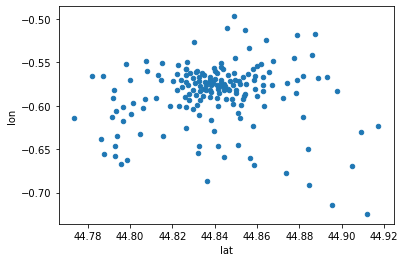

In [6]:
stations.plot(kind='scatter', x='lat', y='lon')

#### Fonction de lecture

In [7]:
def read_stations_attributes(file_name="tb_stvel_p.csv"):
    """
    Lecture du fichier sur les attributs des Vcub à Bordeaux.
    Ce fichier est situé dans ROOT_DATA_REF
    Modification par rapport au fichier original : 
        - Changement de nom des colonnnes :
            - NBSUPPOR -> total_stand
            - NUMSTAT -> station_id
        - Création des features lon & lat features from 'Geo Point'
    
    Parameters
    ----------
    file_name : str
        Nom du fichier
    
    Returns
    -------
    activite : DataFrame
        
    Examples
    --------
    
    stations = read_stations_attributes()
    """
    
    column_dtypes = {'NUMSTAT': 'uint8'}
    usecols = ['Geo Point', 'Geo Shape', 'COMMUNE', 'NBSUPPOR',
              'NOM', 'TYPEA', 'ADRESSE', 'TARIF', 'NUMSTAT']
    
    stations = pd.read_csv(ROOT_DATA_REF+file_name, sep=';',
                           dtype=column_dtypes, usecols=usecols)

    # Naming
    stations.rename(columns={'NBSUPPOR': 'total_stand'}, inplace=True)
    stations.rename(columns={'NUMSTAT': 'station_id'}, inplace=True)

    # Create lon / lat
    stations['lat'] = stations['Geo Point'].apply(lambda x : x.split(',')[0])
    stations['lat'] = stations['lat'].astype(float)
    stations['lon'] = stations['Geo Point'].apply(lambda x : x.split(',')[1])
    stations['lon'] = stations['lon'].astype(float)
    
    return stations

In [8]:
stations = read_stations_attributes()

In [9]:
stations.tail()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
169,"44.8059145,-0.6023231","{""type"": ""Point"", ""coordinates"": [-0.6023231, ...",TALENCE,40,Arts et Métiers,VCUB,"av des Facultés, derrière la station Tram.",VLS,112,44.805915,-0.602323
170,"44.8669415,-0.5760778","{""type"": ""Point"", ""coordinates"": [-0.5760778, ...",LE BOUSCAT,20,Le Bouscat Ravezies,VCUB,"allée de Boutaut, au niveau du P+R",VLS,118,44.866942,-0.576078
171,"44.826297,-0.5570718","{""type"": ""Point"", ""coordinates"": [-0.5570718, ...",BORDEAUX,22,Gare St Jean,VCUB,rue St Vincent de Paul (terminus bus),VLS,127,44.826297,-0.557072
172,"44.8282573,-0.5623689","{""type"": ""Point"", ""coordinates"": [-0.5623689, ...",BORDEAUX,25,Place André Meunier (fermée le 16/11/2016. Réo...,VCUB,"Cours Barbey, à l'angle avec le cours de la Marne",VLS,137,44.828257,-0.562369
173,"44.7968805,-0.6018689","{""type"": ""Point"", ""coordinates"": [-0.6018689, ...",TALENCE,20,Ecole de Management,VCUB,"cours de la Libération, devant BEM",VLS,113,44.796881,-0.601869


#### Industrialisation

In [10]:
from vcub_keeper.reader.reader import read_stations_attributes

In [11]:
stations = read_stations_attributes()

In [12]:
stations.head()

,Geo Point,Geo Shape,COMMUNE,total_stand,NOM,TYPEA,ADRESSE,TARIF,station_id,lat,lon
0,"44.8351755,-0.5720497","{""type"": ""Point"", ""coordinates"": [-0.5720497, ...",BORDEAUX,17,Grosse Cloche (fermée depuis le 26/09/2016. Ré...,VCUB,12 place de la Ferme de Richemont,VLS,104,44.835175,-0.572050
1,"44.8723721,-0.5906954","{""type"": ""Point"", ""coordinates"": [-0.5906954, ...",BRUGES,20,Bruges La Vache,VCUB,Rue Léopold Laplante,VLS PLUS,169,44.872372,-0.590695
2,"44.8500962,-0.5855819","{""type"": ""Point"", ""coordinates"": [-0.5855819, ...",BORDEAUX,16,Place Marie Brizard (supprimée le 11 mars 2016...,VCUB,209 rue Fondaudège,VLS,35,44.850096,-0.585582
3,"44.8492876,-0.4966899","{""type"": ""Point"", ""coordinates"": [-0.4966899, ...",ARTIGUES-PRES-BORDEAUX,19,Artigues Feydeau,VCUB,22 Boulevard Feydeau,VLS PLUS,150,44.849288,-0.496690
4,"44.7821503,-0.5661566","{""type"": ""Point"", ""coordinates"": [-0.5661566, ...",VILLENAVE-D'ORNON,21,Pont de la Maye (retirée le 19 novembre 2015 e...,VCUB,face au 564 route de Toulouse,VLS PLUS,76,44.782150,-0.566157


In [13]:
stations.shape

(174, 11)